# Wine Quality Dataset

The goal is to build a model that can accurately predict whether wine will be recommended or not based on the characteristics of the wine like alcohol level, pH, citric acid, quality and others.


1. import the libraries that would be used for data exploration

- pandas for data wrangling
- matplotlib and seaborn for visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the dataset into a pandas dataframe and print out the first 10 rows of the dataframe

In [2]:
wine = pd.read_csv('winequality.csv')
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,False


3. Data exploration;

 - used shape method to see how many rows and columns are in the dataframe
 - used the describe function to show the statistical explanation of the dataset
 - info function to see the datatypes of each feature in the dataset
 - columns method to print out all the column titles

In [3]:
wine.shape

(4898, 13)

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- The average alcohol content is 10.514267 and the average wine quality is 5.877909

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
recommend               4898 non-null bool
dtypes: bool(1), float64(11), int64(1)
memory usage: 464.0 KB


- all the columns except recommend contain numeric datatype; recommend contains boolean datatype wgich I would be converting to object to be able to perform some exploratory analysis on the dataset

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'recommend'],
      dtype='object')

- to check if there are any missing values in the dataset

In [7]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommend               0
dtype: int64

- Converting the recommend column from boolean dtype to object dtype

In [8]:
bools = wine.select_dtypes(include=[bool])
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

for column in bools:
    wine[column] = wine[column].map(booleanDictionary)

In [11]:
#confirm the changed datatype
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
recommend                object
dtype: object

I would like to know the distribution of the dataset
- how many wines were recommended and how many were rejected
- quality of wines available in the dataset

In [12]:
wine['recommend'].value_counts()

FALSE    3838
TRUE     1060
Name: recommend, dtype: int64

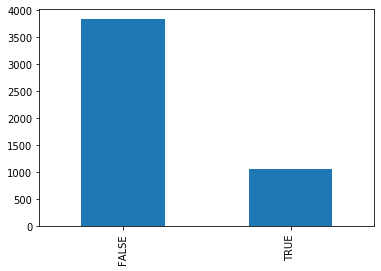

In [18]:
wine['recommend'].value_counts().plot(x =wine['recommend'], kind='bar')

In [19]:
wine['recommend'].value_counts(normalize=True) *100

FALSE    78.358514
TRUE     21.641486
Name: recommend, dtype: float64

The dataset is not balanced,because over 78% of the dataset is wine that was not recommended while the remaining 21% is wine that was recommended.

In [9]:
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

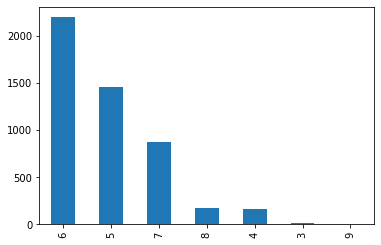

In [20]:
wine['quality'].value_counts().plot(x =wine['quality'], kind='bar')

I would like to know how the wine quality determines whether it would be recommended or not, so I'll use countplots to visualize the distribution

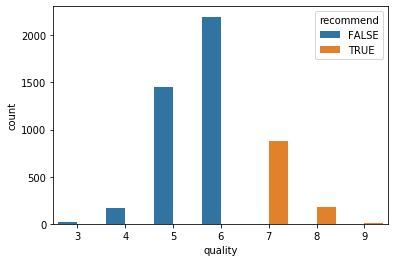

In [22]:
sns.countplot(data=wine, x='quality', hue='recommend')

- Wine with quality below 7 are rejected

I want to check the correlation of the other features to wine quality because wine quality is the main determinant for wine recommendation

In [24]:
quality_corr_coeffs = wine.corr()['quality'].abs().sort_values()
quality_corr_coeffs

free sulfur dioxide     0.008158
citric acid             0.009209
sulphates               0.053678
residual sugar          0.097577
pH                      0.099427
fixed acidity           0.113663
total sulfur dioxide    0.174737
volatile acidity        0.194723
chlorides               0.209934
density                 0.307123
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

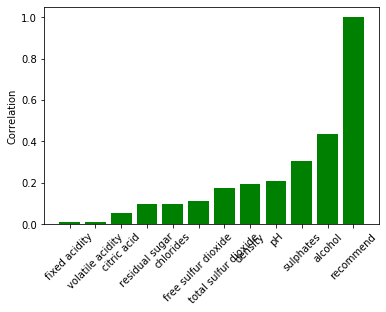

In [27]:
plt.bar(wine.columns.drop(['quality']), quality_corr_coeffs, color='green')
plt.xticks(rotation=45)
plt.ylabel('Correlation')
plt.show()

I would like to see the distribution of the alcohol level of the wines in the dataset

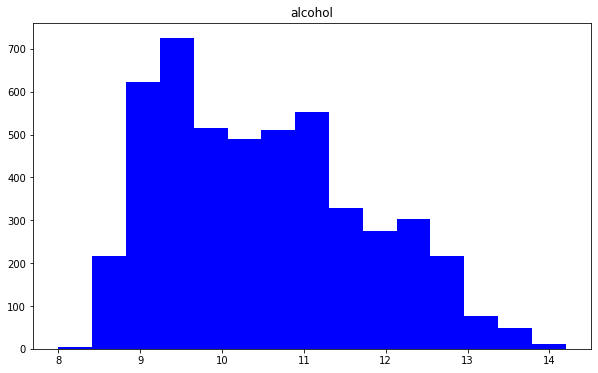

In [39]:
wine.hist(column='alcohol',bins=15,grid=False,figsize=(10,6),color='b')
plt.show()

In [28]:
wine['alcohol'].value_counts()

9.400000     229
9.500000     228
9.200000     199
9.000000     185
10.000000    162
10.500000    160
11.000000    158
10.400000    153
9.100000     144
9.800000     136
10.800000    135
9.300000     134
10.200000    130
9.600000     128
11.400000    121
10.100000    114
10.600000    114
11.200000    112
9.900000     109
8.800000     107
9.700000     105
12.000000    102
11.300000    101
10.700000     96
8.900000      95
10.900000     88
11.500000     88
12.200000     86
10.300000     85
12.500000     83
            ... 
10.933333      2
11.940000      2
10.550000      2
10.980000      1
12.333333      1
11.650000      1
13.550000      1
11.733333      1
11.266667      1
11.350000      1
12.066667      1
11.950000      1
10.533333      1
10.566667      1
14.050000      1
12.050000      1
13.050000      1
11.433333      1
14.200000      1
11.066667      1
11.850000      1
11.366667      1
9.750000       1
10.033333      1
12.250000      1
9.633333       1
11.466667      1
10.650000     

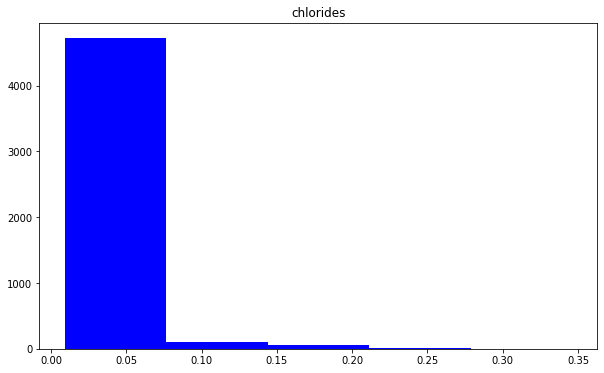

In [33]:
wine.hist(column='chlorides',bins=5,grid=False,figsize=(10,6),color='b')
plt.show()

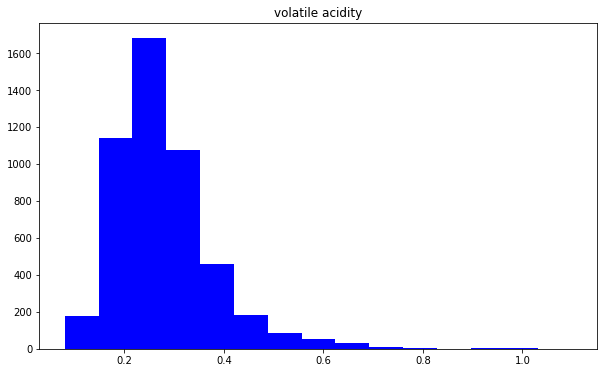

In [34]:
wine.hist(column='volatile acidity',bins=15,grid=False,figsize=(10,6),color='b')
plt.show()

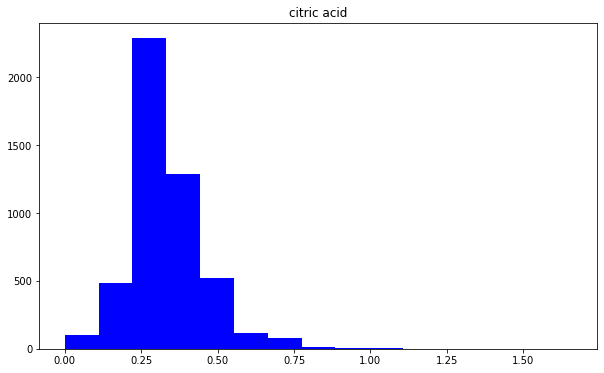

In [35]:
wine.hist(column='citric acid',bins=15,grid=False,figsize=(10,6),color='b')
plt.show()

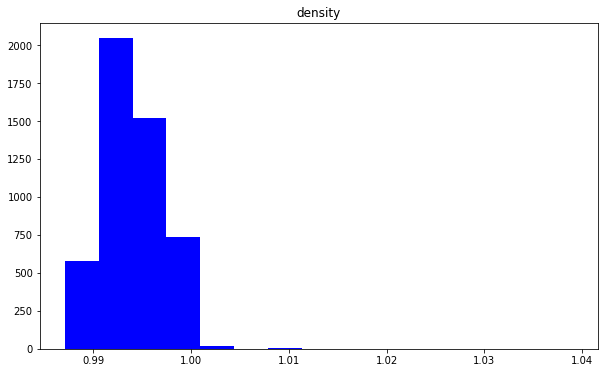

In [36]:
wine.hist(column='density',bins=15,grid=False,figsize=(10,6),color='b')
plt.show()

A visulization of the relationship of the fixed acidity and alccohol level of the wine with the quality

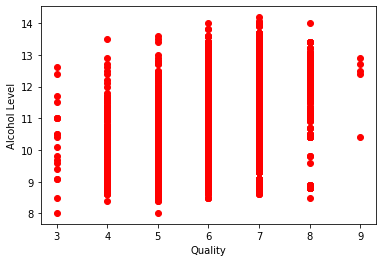

In [38]:
plt.scatter(x=wine['quality'], y=wine['alcohol'], c='r')
plt.xlabel('Quality')
plt.ylabel('Alcohol Level')
plt.show()

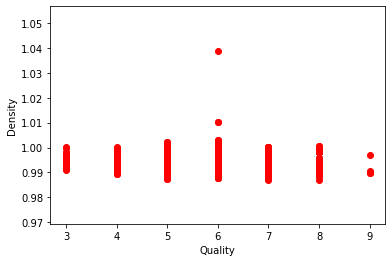

In [49]:
plt.scatter(x=wine['quality'], y=wine['density'], c='r')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

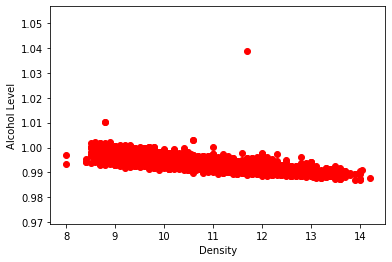

In [39]:
plt.scatter(y=wine['density'], x=wine['alcohol'], c='r')
plt.xlabel('Density')
plt.ylabel('Alcohol Level')
plt.show()

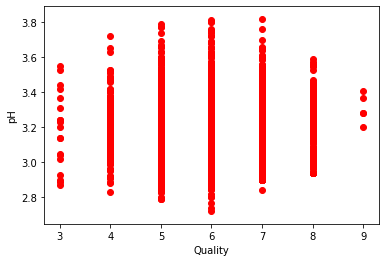

In [40]:
plt.scatter(x=wine['quality'], y=wine['pH'], c='r')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

# Modell Training

I will be using stratified shuffle split to split my dataset into train and test sets so that I can have enough proportion of data to train and test the models. My test set will be 20% of the dataset and the train set will be 80%


<b>Features</b>
- fixed acidity           
- volatile acidity        
- citric acid             
- residual sugar          
- chlorides               
- free sulfur dioxide     
- total sulfur dioxide    
- density                 
- pH                      
- sulphates               
- alcohol                 
- quality             

<b>Target</b>
- recommend

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

In [42]:
for train_index, test_index in split.split(wine, wine['recommend']):
    train = wine.loc[train_index]
    test = wine.loc[test_index]

In [43]:
len(train)

3918

In [44]:
len(test)

980

In [45]:
train['recommend'].value_counts(normalize=True)*100

FALSE    78.356304
TRUE     21.643696
Name: recommend, dtype: float64

In [46]:
test['recommend'].value_counts(normalize=True)*100

FALSE    78.367347
TRUE     21.632653
Name: recommend, dtype: float64

I have selected some classification algorithms to use on my dataset. 
I am going to use cross validation to see how well the model is doing with the train set before using it on my test set, the model with the highest accuracy with cross validation would be the final model to be used.

In [47]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=15)

In [49]:
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 13)
tree = DecisionTreeClassifier()
clf = RandomForestClassifier()
nb = GaussianNB()
svc = SVC()

Feature and target variable split; 

In [50]:
y = wine['recommend']
x = wine.drop(['recommend'], axis=1)

# Logistic Regression

In [52]:
y_pred = cross_val_predict(lr, X=x, y=y, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [53]:
confusion_matrix(y, y_pred)

array([[3837,    1],
       [   2, 1058]], dtype=int64)

In [54]:
accuracy_score(y, y_pred)

0.9993875051041241

# KNN

In [55]:
y_pred2 = cross_val_predict(knn, X=x, y=y, cv=10)

In [56]:
confusion_matrix(y, y_pred2)

array([[3629,  209],
       [ 787,  273]], dtype=int64)

In [57]:
accuracy_score(y, y_pred2)

0.7966516945692119

# Naive Bayes

In [58]:
y_pred3 = cross_val_predict(nb, X=x, y=y, cv=10)

In [59]:
confusion_matrix(y, y_pred3)

array([[3793,   45],
       [ 116,  944]], dtype=int64)

In [60]:
accuracy_score(y, y_pred3)

0.9671294405879951

# Model Testing
Logistic regression has given the highest accuracy with cross validation, I will be using logistic regression model on the test set

In [61]:
lr.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
a = test.drop(['recommend'], axis=1)
b = test['recommend']
predictions = lr.predict(a)

In [63]:
test['Predict'] = predictions

In [87]:
correct = 0
total = test.shape[0]
    
for row in test.iterrows():
    row = row[1]
    if row['recommend'] == row['Predict']:
        correct += 1
        
print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', (correct/total)*100)

Correct: 980
Incorrect: 0
Accuracy: 100.0


In [64]:
confusion_matrix(b, predictions)

array([[768,   0],
       [  0, 212]], dtype=int64)

In [65]:
accuracy_score(b, predictions)

1.0

# Conclusion
The logistic Regression model has 100% accuracy with the test set.